### everyting that was performed on olivetti images will be performed on digits dataset

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
digits = datasets.load_digits()

In [17]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [18]:
digits.data.shape

(1797, 64)

In [19]:
digits.images.shape

(1797, 8, 8)

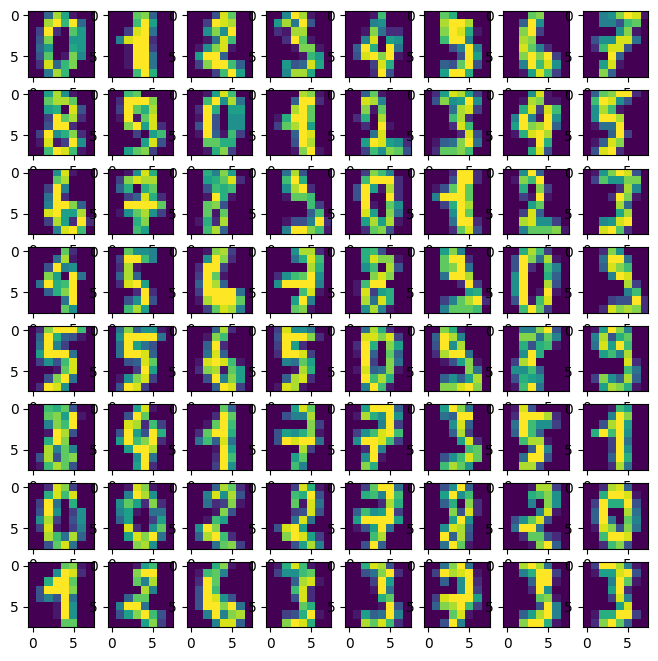

In [20]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(digits.images[i])
plt.show()

In [21]:
x = digits.data
pca = PCA()
pca.fit(x)
pca.components_.shape

(64, 64)

In [22]:
k = 0
total = 0
while total < 0.99:
    total += pca.explained_variance_ratio_[k]
    k+=1
k

41

#### This, means we only need k = 41 components out of 64 to get the variance of 0.99

In [25]:
pca2 = PCA(n_components=k, whiten = True)
transformed_data = pca2.fit_transform(x) ## USE PCA2 not "PCA"
transformed_data.shape

(1797, 41)

In [27]:
x_approx = pca2.inverse_transform(transformed_data)
x_approx.shape

(1797, 64)

In [31]:
x_approx = x_approx.reshape(1797, 8, 8)
x_approx.shape

(1797, 8, 8)

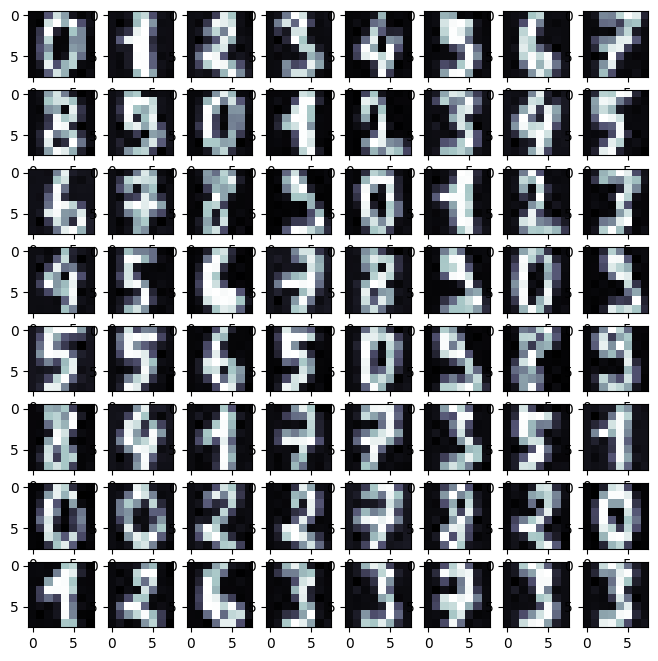

In [32]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx[i], cmap = plt.cm.bone)
plt.show()

### EIGENFACES for digits

In [33]:
eigv =  pca2.components_
eigv.shape

(41, 64)

In [34]:
eigv = eigv.reshape(41, 8, 8)
eigv.shape

(41, 8, 8)

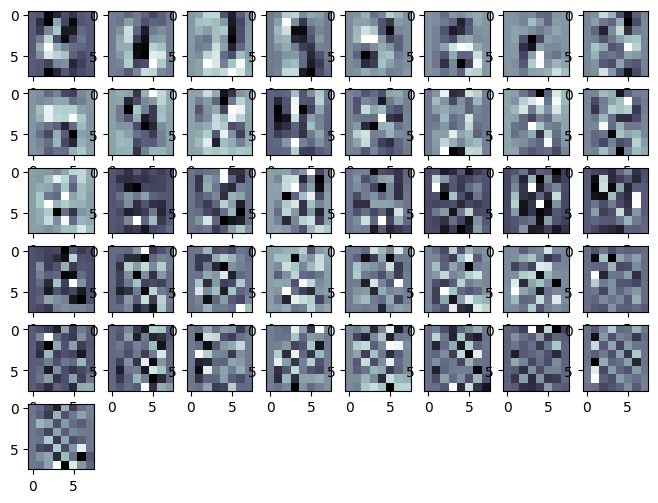

In [36]:
fig = plt.figure(figsize = (8, 8))
for i in range(41):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigv[i] , cmap = plt.cm.bone)
plt.show()